In [92]:
!pip install librosa

In [93]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [94]:
import os

paths = []
labels = []

# Remove double quotes from the directory path
directory_path = r"C:\Users\ADMIN\Documents\Projects\DL projects\Voice_Emotion_Detection\TESS Toronto emotional speech set data"
for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        paths.append(file_path)
        # Extract label from filename
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        
    if len(paths) >= 2800:
        break

print('Dataset is Loaded')


Dataset is Loaded


In [95]:
len(paths)

2772

In [96]:
paths[-1]

'C:\\Users\\ADMIN\\Documents\\Projects\\DL projects\\Voice_Emotion_Detection\\TESS Toronto emotional speech set data\\YAF_sad\\YAF_youth_sad.wav'

In [97]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [98]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\ADMIN\Documents\Projects\DL projects\...,angry
1,C:\Users\ADMIN\Documents\Projects\DL projects\...,angry
2,C:\Users\ADMIN\Documents\Projects\DL projects\...,angry
3,C:\Users\ADMIN\Documents\Projects\DL projects\...,angry
4,C:\Users\ADMIN\Documents\Projects\DL projects\...,angry


In [99]:
df['label'].value_counts()

label
angry      396
disgust    396
fear       396
happy      396
neutral    396
ps         396
sad        396
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

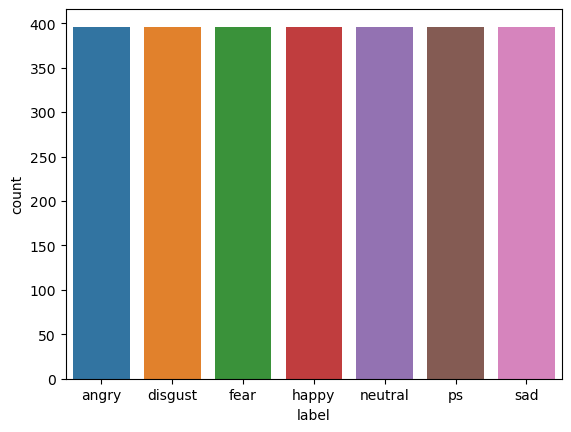

In [100]:
sns.countplot(data=df, x='label')

In [101]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

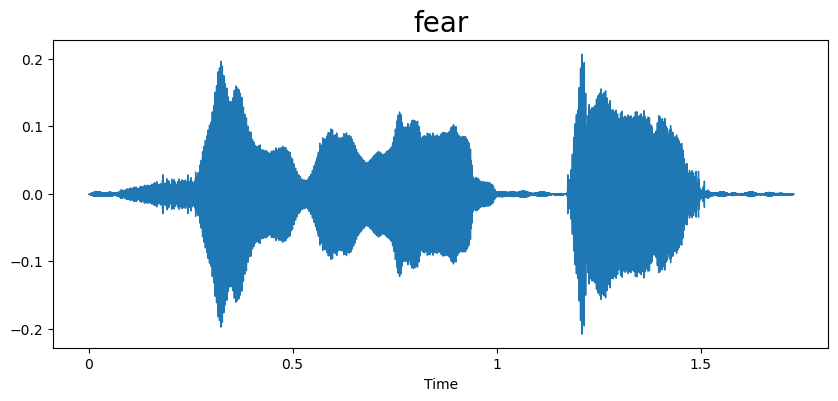

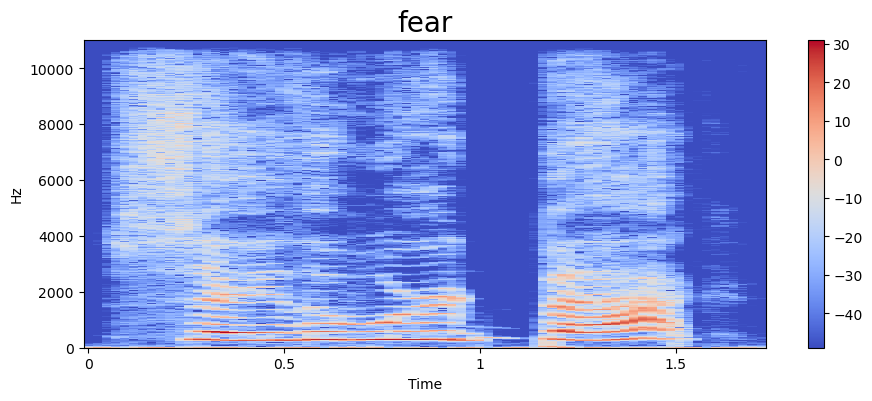

In [102]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

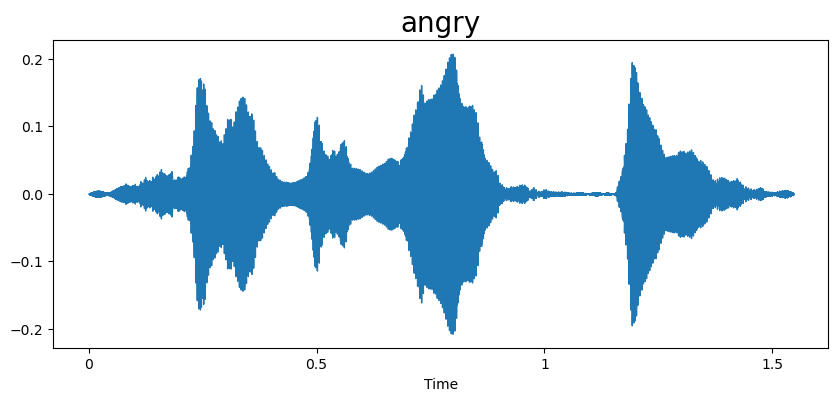

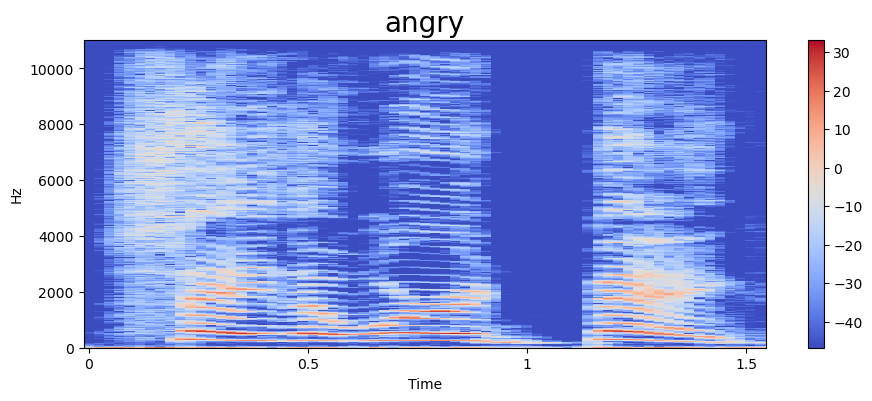

In [103]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

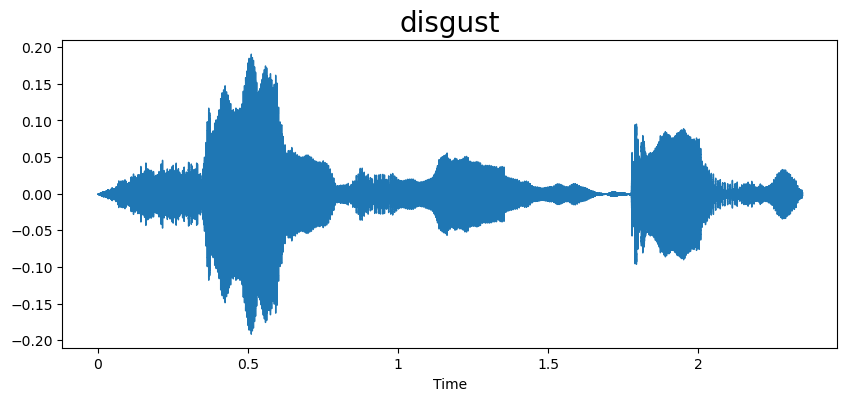

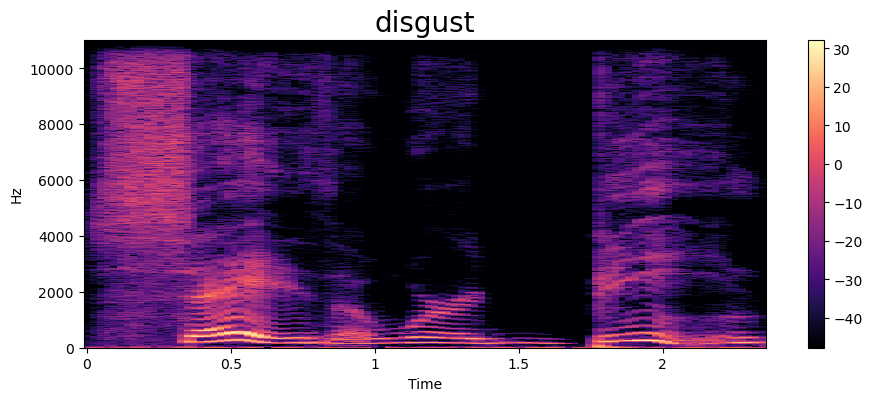

In [104]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

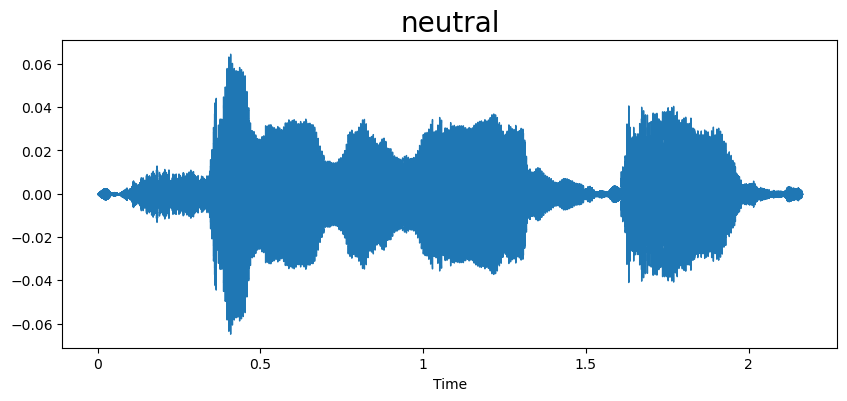

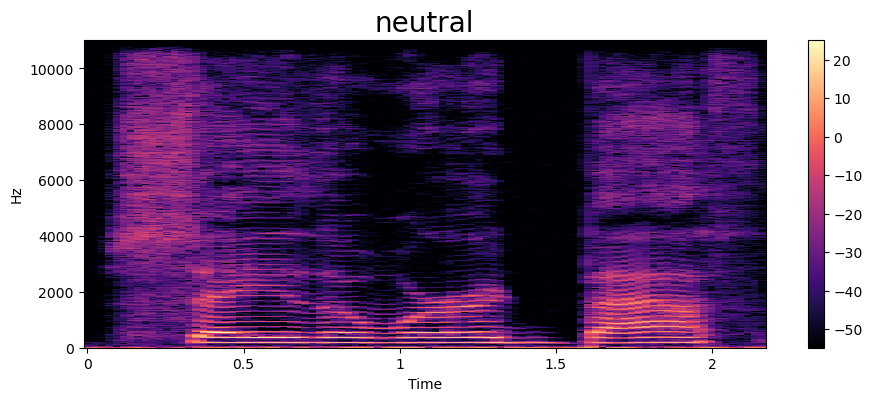

In [105]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

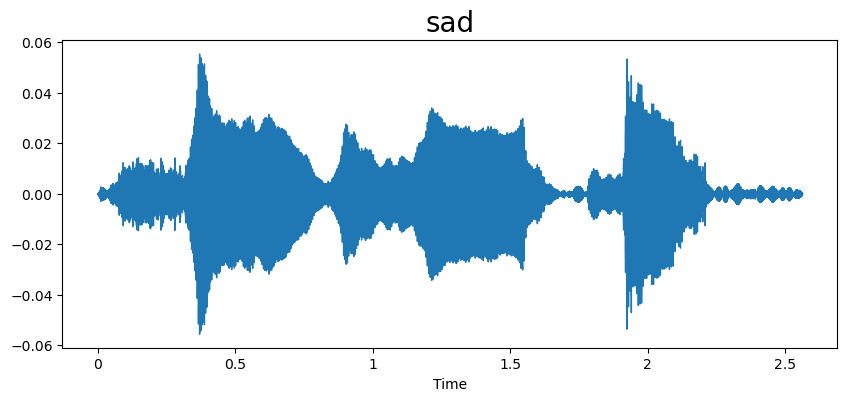

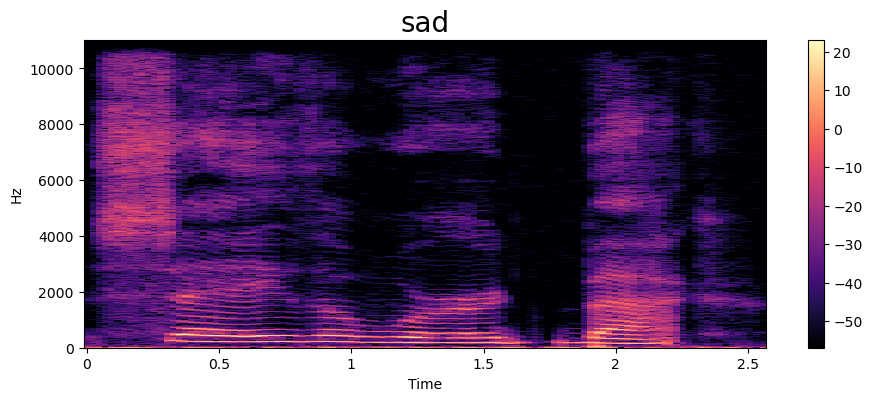

In [106]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

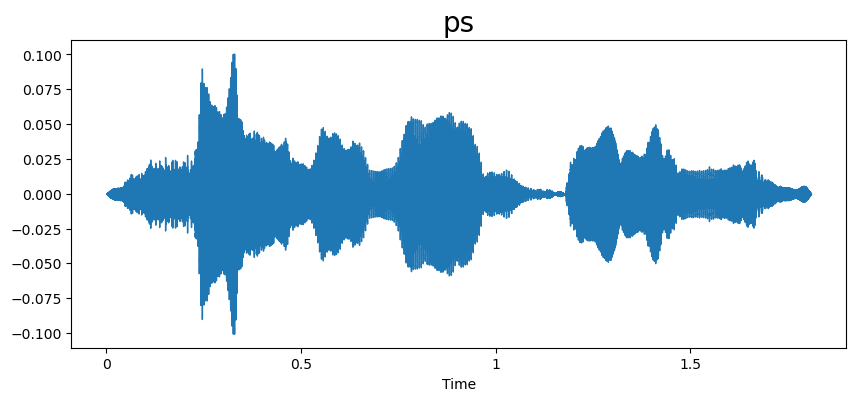

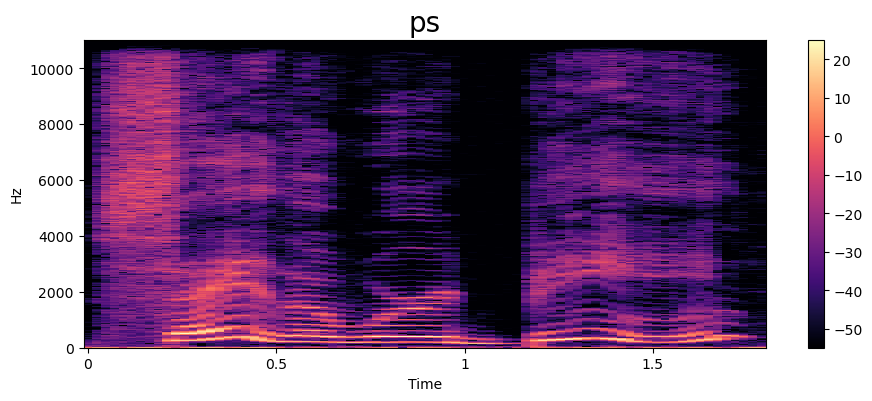

In [107]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

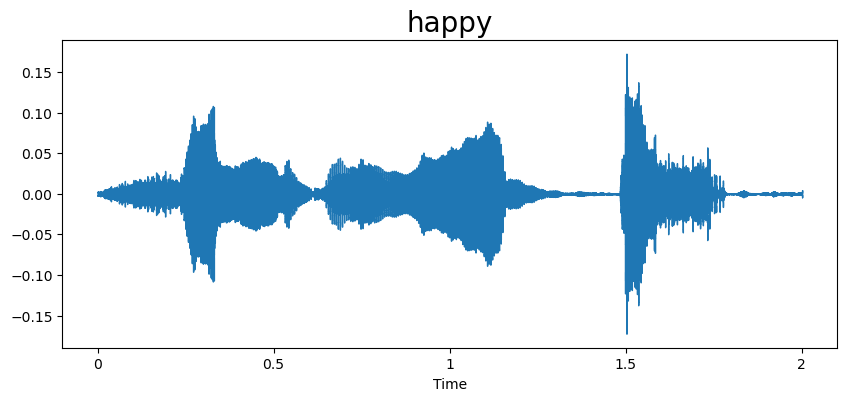

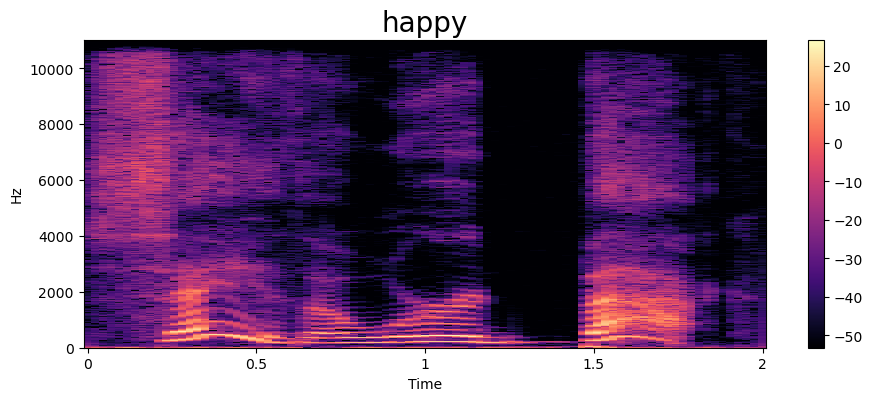

In [108]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [109]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [110]:
extract_mfcc(df['speech'][0])

array([-4.3405756e+02,  7.7445503e+01,  1.0865500e+01,  1.6092943e+01,
        8.0496283e+00,  1.8421738e+00, -2.2560184e+01,  8.3222389e+00,
       -1.7183249e+01, -1.5766746e+01, -1.2134313e+01, -5.7764096e+00,
       -8.9554882e+00,  6.9833314e-01, -1.1103865e+01, -8.1354189e-01,
       -4.6328311e+00, -1.6325022e+00, -4.9684587e+00, -9.6673241e+00,
       -3.6517298e+00,  8.9174944e-01,  5.8402104e+00,  2.1608761e+01,
        2.1307215e+01,  2.7543770e+01,  1.3491404e+01,  1.1720632e+01,
       -3.7795904e+00,  5.0521126e+00,  4.0445771e+00,  6.1320539e+00,
        2.5406415e+00,  4.2290503e-01,  8.8900006e-01,  1.2619472e+00,
        3.6915839e+00,  3.2379963e+00, -1.9563068e+00,  1.2916437e+00],
      dtype=float32)

In [111]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [112]:
X_mfcc

0       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
1       [-445.3795, 73.916176, -0.07950965, -2.6313999...
2       [-428.41193, 80.33891, -3.9446716, -5.4349356,...
3       [-452.1037, 104.47689, 17.366014, -12.362864, ...
4       [-409.53256, 87.89383, 27.89115, -3.7213278, -...
                              ...                        
2767    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2768    [-426.90918, 102.54756, 24.800041, 43.048096, ...
2769    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2770    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
2771    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2772, dtype: object

In [113]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2772, 40)

In [114]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2772, 40, 1)

In [115]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [116]:
y = y.toarray()

In [117]:
y.shape

(2772, 7)

## Create the LSTM Model

In [118]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.3916 - loss: 1.5335 - val_accuracy: 0.4306 - val_loss: 2.1455
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7874 - loss: 0.5867 - val_accuracy: 0.4306 - val_loss: 1.9385
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8862 - loss: 0.3336 - val_accuracy: 0.5423 - val_loss: 1.4385
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9351 - loss: 0.2041 - val_accuracy: 0.4667 - val_loss: 1.8357
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9466 - loss: 0.1720 - val_accuracy: 0.4991 - val_loss: 1.8587
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9623 - loss: 0.1489 - val_accuracy: 0.4811 - val_loss: 2.3082
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9576 - loss: 0.1443 - val_accuracy: 0.4414 - val_loss: 2.4184
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9728 - loss: 0.0878 - val_accuracy: 0.5135 - 

In [120]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

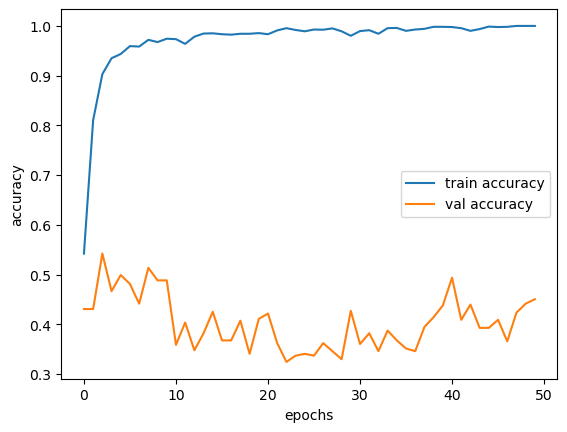

In [121]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

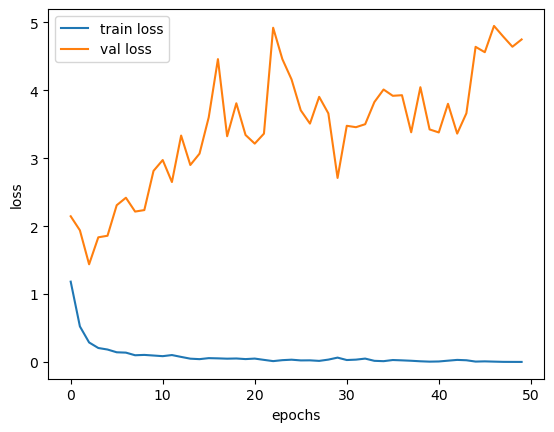

In [122]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Save The Model

In [1]:
# Save the entire model in the new Keras format
model.save("model.keras")

# Save model architecture as JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights to a separate HDF5 file with the required suffix
model.save_weights("model.weights.h5")

NameError: name 'model' is not defined